In [7]:
#import important libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# import libraries for preprocessing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [34]:
# read train data
train_df = pd.read_csv('BBC News Train.csv')
# read test data
test_df = pd.read_csv('BBC News Test.csv')

In [32]:
# the shape of train data
train_df.shape
# take a look at some rows of train data
train_df.head()

,ArticleId,Text,Category,Word_Count
0,1833,worldcom exboss launch defenc lawyer defend fo...,business,185
1,154,german busi confid slide german busi confid fe...,business,194
2,1101,bbc poll indic econom gloom citizen major nati...,business,267
3,1976,lifestyl govern mobil choic faster better funk...,tech,344
4,917,enron boss payout eighteen former enron direct...,business,198


In [10]:
# the structure of data also tells us the number of rows (observations) and columns (variables)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [11]:
# get the category of train data
train_df['Category'].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [12]:
# check null values in train data
train_df.isnull().sum()

# check for duplicate articles
train_df.duplicated(keep=False).sum()

0

# From the output above, we can summarize that:

- There are 1490 rows and 3 columns in train data.

- There are five categories in train data, include 'business', 'tech', 'politics', 'sport' and 'entertainment'.
- There is no missing values.
- There is one integer column and it is Article ID.
- There are two object columns, they are Text and Category.
- There is no duplicate articles.

Next, I will calculate and visualize the count and the proportion of each label in train data.

In [13]:
# calculate the count of each label
train_df['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

In [14]:
# calculate the proportion of each label
train_df['Category'].value_counts()/len(train_df)*100

sport            23.221477
business         22.550336
politics         18.389262
entertainment    18.322148
tech             17.516779
Name: Category, dtype: float64

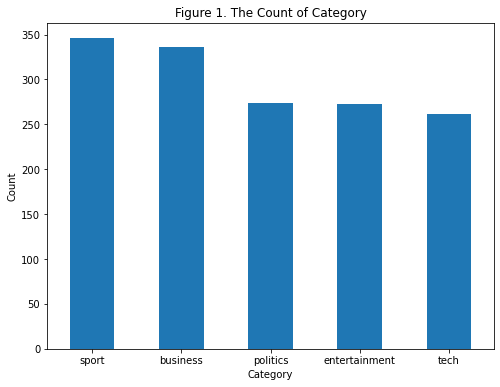

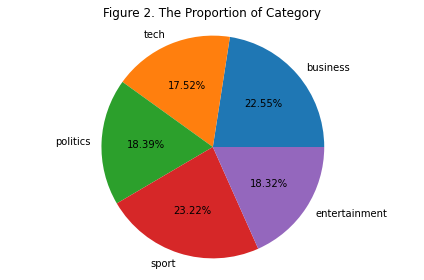

In [15]:
# plot the count of each category
fig, ax = plt.subplots(figsize=(8,6))
train_df['Category'].value_counts().plot(kind='bar', ax=ax)
plt.xlabel("Category")
plt.xticks(rotation=360)
plt.ylabel("Count")
plt.title("Figure 1. The Count of Category")

# plot the proportion of each category
labels = train_df['Category'].unique().tolist()
counts = train_df['Category'].value_counts()
sizes = [counts[v] for v in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%0.2f%%')
ax1.axis('equal')
plt.title("Figure 2. The Proportion of Category")

plt.tight_layout()
plt.show()

 Looking at Figure 2, we can see the proportions of each kind of article. In overall, the number of article for each category is not different too much. I think this is good since if one or two categories was severely underrepresentated or, in contrast, overrepresentative in the train data, then it may cause our model to be biased and/or perform poorly on some or all of the test data.

To preprocess our text simply means to bring our text into a form that is predictable and analyzable for our task. So, what I am going to do is:
1. lowercasing all our text data
2. remove punctuation
3. remove stop words: stop words are a set of commonly used words in a language. Examples of stop words in English are “a”, “the”, “is”, “are” and etc. The intuition behind using stop words is that, by removing low information words from text, we can focus on the important words instead.
4. lemmatization: lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma. For example, runs, running, ran are all forms of the word run, therefore run is the lemma of all these words.

Because I will redo these cleaning steps for test data as well, thus for convenience, I will create a clean_text function for train data and reuse it for cleaning test data later.

In [16]:
from nltk.stem import SnowballStemmer
import re
def clean_text(text):
    # lowercasing all text data
    text = text.lower()
    
    # Remove special characters and numbers using regular expressions
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\d+', '', text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_words]
    
    # Stemming using SnowballStemmer
    stemmer = SnowballStemmer('english')
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    # Join the stemmed tokens back into a single string
    processed_text = ' '.join(stemmed_tokens)
    
    return processed_text

In [17]:
# Apply preprocessing to the text column
train_df['Text'] = train_df['Text'].apply(clean_text)

In [ ]:
# Save the preprocessed data into another file
preprocessed_data_file = 'preprocessed_data_bbc.csv'
train_df.to_csv(preprocessed_data_file, index=False)

print("Preprocessed data saved to:", preprocessed_data_file)

In [18]:
train_df["Text"][0]


'worldcom exboss launch defenc lawyer defend former worldcom chief berni ebber batteri fraud charg call compani whistleblow first wit cynthia cooper worldcom exhead intern account alert director irregular account practic us telecom giant warn led collaps firm follow discoveri bn bn account fraud mr ebber plead guilti charg fraud conspiraci prosecut lawyer argu mr ebber orchestr seri account trick worldcom order employe hide expens inflat revenu meet wall street earn estim ms cooper run consult busi told juri new york wednesday extern auditor arthur andersen approv worldcom account earli said andersen given green light procedur practic use worldcom mr ebber lawyer said unawar fraud argu auditor alert problem ms cooper also said sharehold meet mr ebber often pass technic question compani financ chief give brief answer prosecut star wit former worldcom financi chief scott sullivan said mr ebber order account adjust firm tell hit book howev ms cooper said mr sullivan mention anyth uncomfor

In [19]:
# calculate the count of word per article
train_df["Word_Count"] = train_df['Text'].apply(lambda x: len(x.split()))

In [20]:
# view some first rows of train data
train_df.head()

,ArticleId,Text,Category,Word_Count
0,1833,worldcom exboss launch defenc lawyer defend fo...,business,185
1,154,german busi confid slide german busi confid fe...,business,194
2,1101,bbc poll indic econom gloom citizen major nati...,business,267
3,1976,lifestyl govern mobil choic faster better funk...,tech,344
4,917,enron boss payout eighteen former enron direct...,business,198


In [21]:

# The average count of word per article
np.mean(train_df.Word_Count)

212.85704697986577

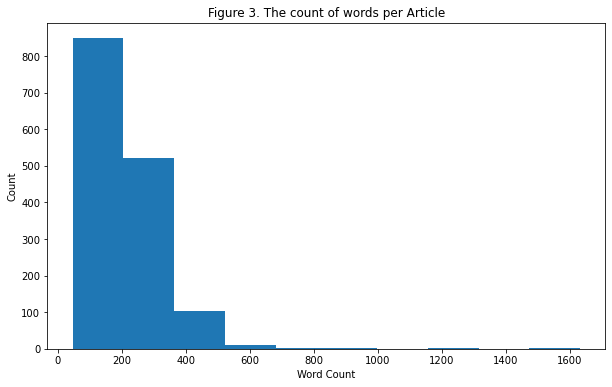

In [22]:
# plot the count of word per article
fig, ax = plt.subplots(figsize=(10,6))
train_df['Word_Count'].plot(kind='hist')
plt.xlabel("Word Count")
plt.xticks(rotation=360)
plt.ylabel("Count")
plt.title("Figure 3. The count of words per Article")
plt.show()

We see that the average count of words per article is about 213 and looking at Figure 3, there are some outliers that have over 750 word count per article. Thus, I would like to remove articles that have more than 750 words. And then I will plot the count of words per category.

In [23]:
# remove outliers have more than 750 words
train_df = train_df[train_df.Word_Count <= 750]
len(train_df)

1484

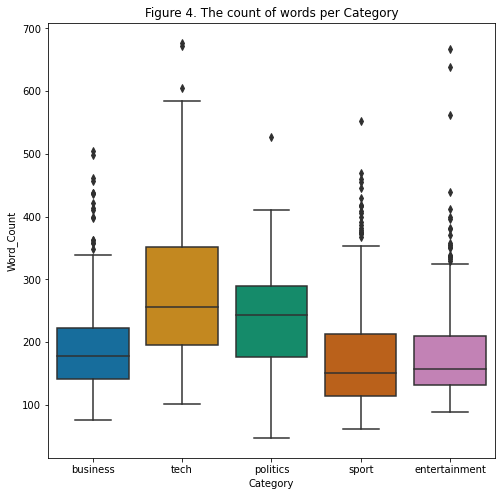

In [24]:
# visualize the count of words per category
fig, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(data = train_df, x = 'Category', y = 'Word_Count', palette = 'colorblind'
           ).set(title = 'Figure 4. The count of words per Category')
plt.show()

Looking at Figure 4, we observe that the mean of word count of each category is not different much, tech and politics have more words and variance than business, sport and entertainment.

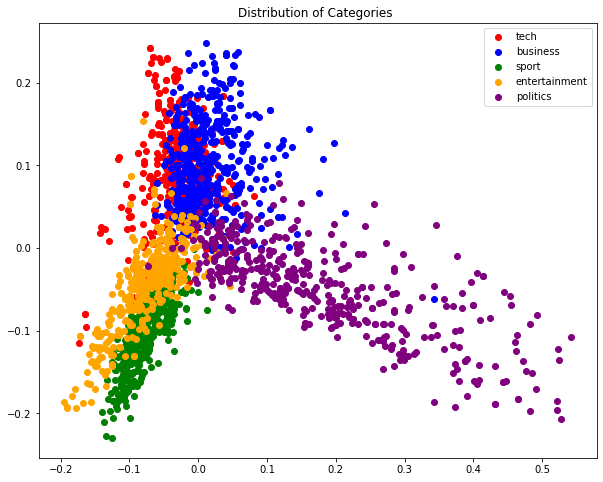

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

train_df = pd.read_csv('preprocessed_bbc_news.csv')


vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(train_df['Text'])

# Reduce dimensionality with PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

# Alternatively, you can use t-SNE for dimensionality reduction
# tsne = TSNE(n_components=2, random_state=42)
# tsne_result = tsne.fit_transform(tfidf_matrix.toarray())

# Add the reduced dimensions to the DataFrame
train_df['Dimension1'] = pca_result[:, 0]
train_df['Dimension2'] = pca_result[:, 1]

# Plot the distribution of data with each category in 2 dimensions
plt.figure(figsize=(10, 8))
categories = train_df['Category'].unique()
colors = ['red', 'blue', 'green', 'orange', 'purple']

for i, category in enumerate(categories):
    category_df = train_df[train_df['Category'] == category]
    plt.scatter(category_df['Dimension1'], category_df['Dimension2'], color=colors[i], label=category)

plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of Categories ')
plt.legend()
plt.show()